     Feature  Target
0  37.454012     0.0
1  95.071431     1.0
2  73.199394     1.0
3  59.865848     1.0
4  15.601864     0.0
Accuracy: 0.98495


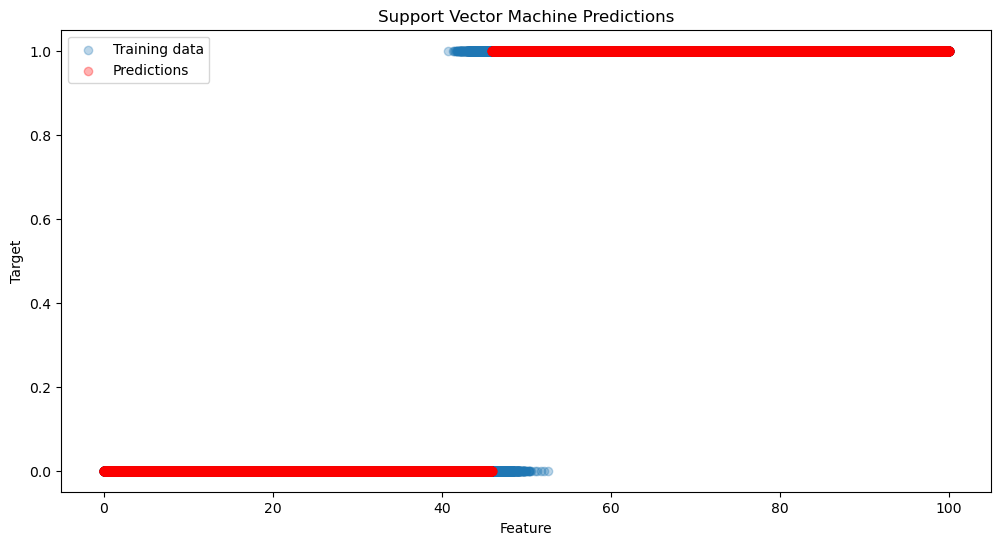

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Seed for reproducibility
np.random.seed(42)

# Generating a large dataset
n_samples = 100000
X = np.random.rand(n_samples, 1) * 100
noise = np.random.randn(n_samples, 1) * 10
y = (5 * X + 20 + noise > 250).astype(int)  # Binary target

# Create DataFrame
data = pd.DataFrame(np.hstack([X, y]), columns=['Feature', 'Target'])
print(data.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting the data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Training data')
plt.scatter(X_test, y_pred, alpha=0.3, color='red', label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Support Vector Machine Predictions')
plt.legend()
plt.show()
